In [1]:
# Import pandas for data processing
import pandas as pd

In [3]:
# Read the dataset
studs = pd.read_csv('studentclusters.csv')
studs.shape

(49, 2)

In [4]:
studs.head()

,marks,shours
0,72,20.0
1,42,19.0
2,77,7.0
3,93,22.0
4,30,20.0


In [5]:
studs.describe()

,marks,shours
count,49.000000,49.000000
mean,50.938776,15.397959
std,20.011880,7.169800
min,20.000000,2.000000
25%,37.000000,9.000000
50%,49.000000,16.000000
75%,64.000000,21.000000
max,93.000000,30.000000


In [12]:
# Visualise the data using Scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

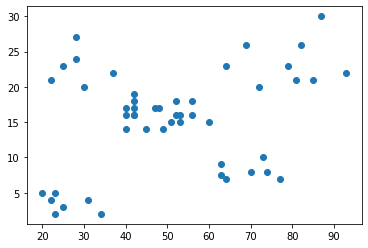

In [17]:
plt.scatter('marks', 'shours', data=studs)

In [21]:
# Fit and Transform the data for MinMax normalization
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0, 1)) 
rescaled_studs = scaler.fit_transform(studs) 
rescaled_studs

array([[0.71232877, 0.64285714],
       [0.30136986, 0.60714286],
       [0.78082192, 0.17857143],
       [1.        , 0.71428571],
       [0.1369863 , 0.64285714],
       [0.45205479, 0.46428571],
       [0.73972603, 0.21428571],
       [0.10958904, 0.78571429],
       [0.67123288, 0.85714286],
       [0.60273973, 0.17857143],
       [0.91780822, 1.        ],
       [0.68493151, 0.21428571],
       [0.30136986, 0.57142857],
       [0.80821918, 0.75      ],
       [0.23287671, 0.71428571],
       [0.43835616, 0.5       ],
       [0.42465753, 0.46428571],
       [0.06849315, 0.75      ],
       [0.38356164, 0.53571429],
       [0.89041096, 0.67857143],
       [0.02739726, 0.67857143],
       [0.5890411 , 0.19642857],
       [0.30136986, 0.53571429],
       [0.54794521, 0.46428571],
       [0.49315068, 0.57142857],
       [0.04109589, 0.10714286],
       [0.30136986, 0.5       ],
       [0.2739726 , 0.42857143],
       [0.10958904, 0.89285714],
       [0.36986301, 0.53571429],
       [0.

In [22]:
# import KMeans for clustering
from sklearn.cluster import KMeans

In [38]:
# Fit the input data. Create labels and get inertia
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(rescaled_studs)
    cs.append(kmeans.inertia_)
cs

[6.75451733163193,
 4.103170007324023,
 2.4103103356990334,
 1.1557910153077717,
 0.5752619558845886,
 0.4643290198437524,
 0.3644673630086283,
 0.29803453987937667,
 0.27681255939364735,
 0.24379450648312834]

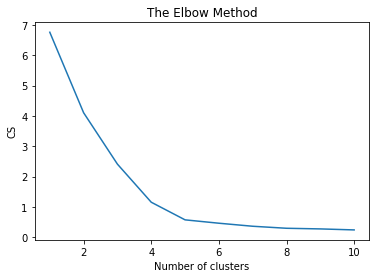

In [40]:
# Visualise the clusters
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [65]:
# Elbow method to determine optimum clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(rescaled_studs)

In [66]:
y_kmeans

array([1, 0, 2, 1, 4, 0, 2, 4, 1, 2, 1, 2, 0, 1, 4, 0, 0, 4, 0, 1, 4, 2,
       0, 0, 0, 3, 0, 0, 4, 0, 3, 3, 2, 3, 0, 3, 0, 0, 0, 2, 3, 0, 1, 0,
       1, 0, 0, 3, 1])

In [67]:
kmeans.cluster_centers_

array([[0.37808219, 0.50714286],
       [0.80974125, 0.76984127],
       [0.67318982, 0.21683673],
       [0.07436399, 0.05612245],
       [0.11415525, 0.74404762]])

In [68]:
X = rescaled_studs
X

array([[0.71232877, 0.64285714],
       [0.30136986, 0.60714286],
       [0.78082192, 0.17857143],
       [1.        , 0.71428571],
       [0.1369863 , 0.64285714],
       [0.45205479, 0.46428571],
       [0.73972603, 0.21428571],
       [0.10958904, 0.78571429],
       [0.67123288, 0.85714286],
       [0.60273973, 0.17857143],
       [0.91780822, 1.        ],
       [0.68493151, 0.21428571],
       [0.30136986, 0.57142857],
       [0.80821918, 0.75      ],
       [0.23287671, 0.71428571],
       [0.43835616, 0.5       ],
       [0.42465753, 0.46428571],
       [0.06849315, 0.75      ],
       [0.38356164, 0.53571429],
       [0.89041096, 0.67857143],
       [0.02739726, 0.67857143],
       [0.5890411 , 0.19642857],
       [0.30136986, 0.53571429],
       [0.54794521, 0.46428571],
       [0.49315068, 0.57142857],
       [0.04109589, 0.10714286],
       [0.30136986, 0.5       ],
       [0.2739726 , 0.42857143],
       [0.10958904, 0.89285714],
       [0.36986301, 0.53571429],
       [0.

In [69]:
print(X[y_kmeans==0], '\n', X[y_kmeans==0].min(), X[y_kmeans==0].max())

[[0.30136986 0.60714286]
 [0.45205479 0.46428571]
 [0.30136986 0.57142857]
 [0.43835616 0.5       ]
 [0.42465753 0.46428571]
 [0.38356164 0.53571429]
 [0.30136986 0.53571429]
 [0.54794521 0.46428571]
 [0.49315068 0.57142857]
 [0.30136986 0.5       ]
 [0.2739726  0.42857143]
 [0.36986301 0.53571429]
 [0.39726027 0.42857143]
 [0.49315068 0.5       ]
 [0.34246575 0.42857143]
 [0.45205479 0.5       ]
 [0.43835616 0.57142857]
 [0.30136986 0.5       ]
 [0.2739726  0.53571429]
 [0.2739726  0.5       ]] 
 0.273972602739726 0.6071428571428571


In [70]:
df = pd.DataFrame(X[:,0], columns=['yk'])

In [71]:
df.describe()

,yk
count,49.000000
mean,0.423819
std,0.274135
min,0.000000
25%,0.232877
50%,0.397260
75%,0.602740
max,1.000000


In [72]:
print(X[y_kmeans==1], '\n', X[y_kmeans==1].min(), X[y_kmeans==1].max())

[[0.71232877 0.64285714]
 [1.         0.71428571]
 [0.67123288 0.85714286]
 [0.91780822 1.        ]
 [0.80821918 0.75      ]
 [0.89041096 0.67857143]
 [0.60273973 0.75      ]
 [0.84931507 0.85714286]
 [0.83561644 0.67857143]] 
 0.6027397260273972 1.0


In [73]:
X[y_kmeans==2]

array([[0.78082192, 0.17857143],
       [0.73972603, 0.21428571],
       [0.60273973, 0.17857143],
       [0.68493151, 0.21428571],
       [0.5890411 , 0.19642857],
       [0.5890411 , 0.25      ],
       [0.7260274 , 0.28571429]])

In [74]:
X[y_kmeans==3]

array([[0.04109589, 0.10714286],
       [0.06849315, 0.03571429],
       [0.15068493, 0.07142857],
       [0.19178082, 0.        ],
       [0.04109589, 0.        ],
       [0.02739726, 0.07142857],
       [0.        , 0.10714286]])

In [75]:
y_kmeans

array([1, 0, 2, 1, 4, 0, 2, 4, 1, 2, 1, 2, 0, 1, 4, 0, 0, 4, 0, 1, 4, 2,
       0, 0, 0, 3, 0, 0, 4, 0, 3, 3, 2, 3, 0, 3, 0, 0, 0, 2, 3, 0, 1, 0,
       1, 0, 0, 3, 1])

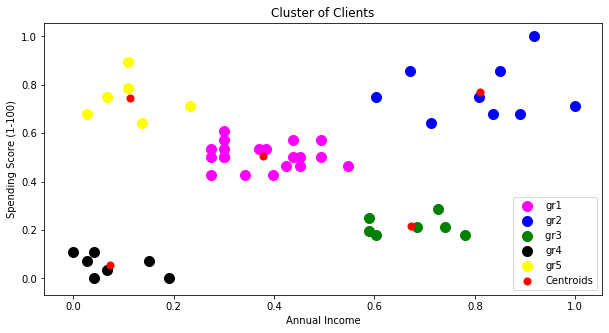

In [78]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='gr1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='gr2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='gr3 ')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='black',label='gr4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='yellow',label='gr5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='red',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
